<a href="https://colab.research.google.com/github/karthebans/DS/blob/main/GEA_Forecasting_with_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark[sql]

     |████████████████████████████████| 281.4 MB 19 kB/s 
     |████████████████████████████████| 198 kB 50.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=6a4d67a8244f15098fbd8e4abae84687a7519386a633f0ab98eb7a4eeba5c001
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/GEA Headedend Data upto 22.10.21csv.csv', parse_dates = True)

FileNotFoundError: ignored

In [ ]:
df.head()

,CREATED_DATE,HEADEND_ID,NPM_PRODUCT_TYPE,FBF_PRODUCT_TYPE,CUSTOMER_COUNT
0,2021-02-01,BAAAIF,FTTC_LT_100,FTTC (<100Mb/s),11088.0
1,2021-02-01,BAAAPP,FTTC_LT_100,FTTC (<100Mb/s),2425.0
2,2021-02-01,BAAAQM,FTTC_LT_100,FTTC (<100Mb/s),3997.0
3,2021-02-01,BAAAQM,FTTP_GE_500,FTTP Premium (>= 500Mb/s access),2.0
4,2021-02-01,BAAAQM,FTTP_LT_100,FTTP (<100Mb/s),8.0


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from fbprophet import Prophet
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
from pyspark.sql import SparkSession
import pyspark
spark = SparkSession.builder.master('local').getOrCreate()

In [ ]:
df.shape

(486379, 5)

In [ ]:
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'], infer_datetime_format=True)

In [ ]:
df['HEADEND_PRODUCT'] = df.HEADEND_ID + '&' + df.NPM_PRODUCT_TYPE

In [ ]:
df

,CREATED_DATE,HEADEND_ID,NPM_PRODUCT_TYPE,FBF_PRODUCT_TYPE,CUSTOMER_COUNT,HEADEND_PRODUCT
0,2021-02-01,BAAAIF,FTTC_LT_100,FTTC (<100Mb/s),11088.0,BAAAIF&FTTC_LT_100
1,2021-02-01,BAAAPP,FTTC_LT_100,FTTC (<100Mb/s),2425.0,BAAAPP&FTTC_LT_100
2,2021-02-01,BAAAQM,FTTC_LT_100,FTTC (<100Mb/s),3997.0,BAAAQM&FTTC_LT_100
3,2021-02-01,BAAAQM,FTTP_GE_500,FTTP Premium (>= 500Mb/s access),2.0,BAAAQM&FTTP_GE_500
4,2021-02-01,BAAAQM,FTTP_LT_100,FTTP (<100Mb/s),8.0,BAAAQM&FTTP_LT_100
...,...,...,...,...,...,...
486374,2021-03-06,BAAEFU,FTTP_GE_500,FTTP Premium (>= 500Mb/s access),1.0,BAAEFU&FTTP_GE_500
486375,2021-03-06,BAAEFU,FTTP_LT_100,FTTP (<100Mb/s),17.0,BAAEFU&FTTP_LT_100
486376,2021-03-06,BAAEFU,FTTP_LT_500,FTTP Ultrafast (< 500Mb/s access),9.0,BAAEFU&FTTP_LT_500
486377,2021-03-06,BAAEFY,FTTC_LT_100,FTTC (<100Mb/s),146.0,BAAEFY&FTTC_LT_100


In [ ]:
df = df.drop(columns = ['HEADEND_ID', 'NPM_PRODUCT_TYPE','FBF_PRODUCT_TYPE'])

In [ ]:
df

,CREATED_DATE,CUSTOMER_COUNT,HEADEND_PRODUCT
0,2021-02-01,11088.0,BAAAIF&FTTC_LT_100
1,2021-02-01,2425.0,BAAAPP&FTTC_LT_100
2,2021-02-01,3997.0,BAAAQM&FTTC_LT_100
3,2021-02-01,2.0,BAAAQM&FTTP_GE_500
4,2021-02-01,8.0,BAAAQM&FTTP_LT_100
...,...,...,...
486374,2021-03-06,1.0,BAAEFU&FTTP_GE_500
486375,2021-03-06,17.0,BAAEFU&FTTP_LT_100
486376,2021-03-06,9.0,BAAEFU&FTTP_LT_500
486377,2021-03-06,146.0,BAAEFY&FTTC_LT_100


In [ ]:
df.isna().sum()

CREATED_DATE       0
CUSTOMER_COUNT     1
HEADEND_PRODUCT    1
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.columns = ['date','sales','store_id']

In [ ]:
item_df = df

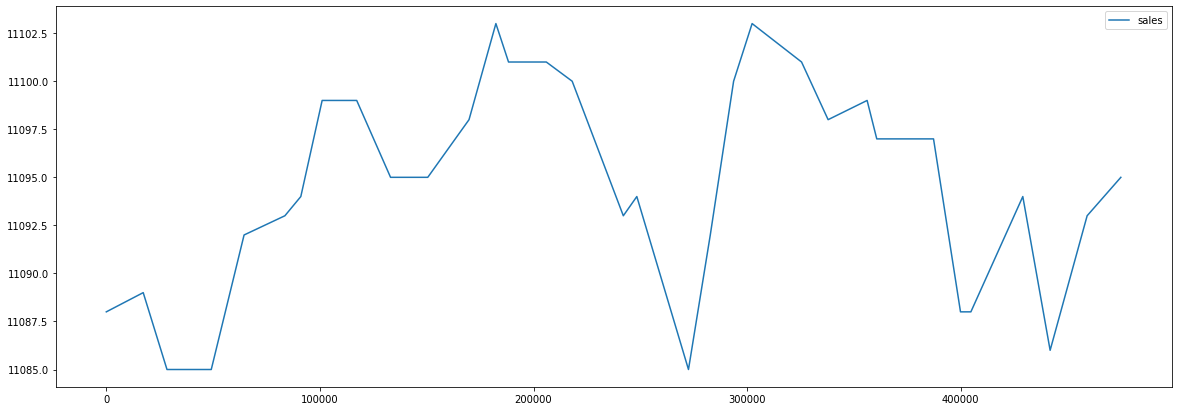

In [ ]:
item_df.query("store_id == 'BAAAIF&FTTC_LT_100'")[['sales']].plot(figsize=(20,7))
plt.show()

In [ ]:
sdf = spark.createDataFrame(df)
# sdf.printSchema() #data type of each col
# sdf.show(5) #It gives you head of pandas DataFrame
# sdf.count() #500 records

In [ ]:
# sdf.select(['store_id']).groupby('store_id').agg({'store_id': 'count'}).show()

In [ ]:
sdf.createOrReplaceTempView("sales")
spark.sql("select store_id, count(*) from sales group by store_id order by store_id").show()

In [ ]:
df 

,date,sales,store_id
0,2021-02-01,11088.0,BAAAIF&FTTC_LT_100
1,2021-02-01,2425.0,BAAAPP&FTTC_LT_100
2,2021-02-01,3997.0,BAAAQM&FTTC_LT_100
3,2021-02-01,2.0,BAAAQM&FTTP_GE_500
4,2021-02-01,8.0,BAAAQM&FTTP_LT_100
...,...,...,...
486373,2021-03-06,194.0,BAAEFU&FTTC_LT_100
486374,2021-03-06,1.0,BAAEFU&FTTP_GE_500
486375,2021-03-06,17.0,BAAEFU&FTTP_LT_100
486376,2021-03-06,9.0,BAAEFU&FTTP_LT_500


In [ ]:
sql = "SELECT store_id, date as ds, sales as y FROM sales GROUP BY store_id"
# spark.sql(sql).show()

In [ ]:
store_part = (spark.sql(sql).repartition(spark.sparkContext.defaultParallelism, ["store_id"])).cache()
store_part.explain()

AnalysisException: ignored

In [ ]:
from pyspark.sql.types import *
result_schema = StructType([
                  StructField('ds', TimestampType()),
                  StructField('store_id', IntegerType()),
                  StructField('y', DoubleType()),
                  StructField('yhat', DoubleType()),
                  StructField('yhat_upper', DoubleType()),
                  StructField('yhat_lower', DoubleType())])

In [ ]:
from pyspark.sql.functions import pandas_udf, PandasUDFType
@pandas_udf(result_schema, PandasUDFType.GROUPED_MAP)
def forecast_sales(store_pd):
    model = Prophet(interval_width=0.95, seasonality_mode= 'multiplicative', weekly_seasonality=True, yearly_seasonality=True)
    model.fit(store_pd)
    future_pd = model.make_future_dataframe(periods=100, freq='w', include_history=False)
    forecast_pd = model.predict(future_pd)
    f_pd = forecast_pd[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].set_index('ds')
    st_pd = store_pd[['ds', 'store_id', 'y']].set_index('ds')
    result_pd = f_pd.join(st_pd, how='left')
    result_pd.reset_index(level=0, inplace=True)
    result_pd['store_id'] = store_pd['store_id'].iloc[0]
    return result_pd[['ds', 'store_id', 'y', 'yhat', 'yhat_upper', 'yhat_lower']]

In [ ]:
from pyspark.sql.functions import current_date
results = (store_part.groupby('store_id').apply(forecast_sales).withColumn('training_date', current_date()))
results.cache()
results.show()

In [ ]:
results.show(100)

In [ ]:
results.coalesce(1)
print(results.count())
results.createOrReplaceTempView('forecasted')
spark.sql("SELECT store_id, count(*) FROM  forecasted GROUP BY store_id").show()

In [ ]:
final_df = results.toPandas()

In [ ]:
final_df = final_df.set_index('ds')
final_df.query('store_id == 25')[['y', 'yhat']].plot()
plt.show()

In [ ]:
final_df.query('store_id == 41')[['y', 'yhat']].plot()
plt.show()